In [10]:
# %pip install spacy pyspellchecker matplotlib
# !python3 -m spacy download en_core_web_sm 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 2.0 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
import spacy
from spellchecker import SpellChecker
import matplotlib.pyplot as plt

In [12]:

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Instantiate the spellchecker
spell = SpellChecker()

In [17]:
# Sample of a text with some misspellings and punctuation errors
text = "Hello Veuri biasci text with some misspellings and some punctuation errors Why are there missing dots"

# Process the text with spaCy
doc = nlp(text)

# Look for misspelled words
misspelled = [token.text for token in doc if spell.unknown([token.text])]

# Identify (very specific) punctuation mistakes
punctuation_errors = []
for token in doc[:-1]:
    if token.text == "Hello" and doc[token.i + 1].text != ",":
        punctuation_errors.append(f"Missing comma after '{token.text}'")
    elif token.is_sent_start and token.text not in ".?!" and doc[token.i - 1].text not in ".?!":
        punctuation_errors.append(f"Missing punctuation before '{token.text}'")

# Check for ending punctuation of the whole text
if doc[-1].text not in ".?!":
    punctuation_errors.append(f"Missing ending punctuation after '{doc[-1].text}'")

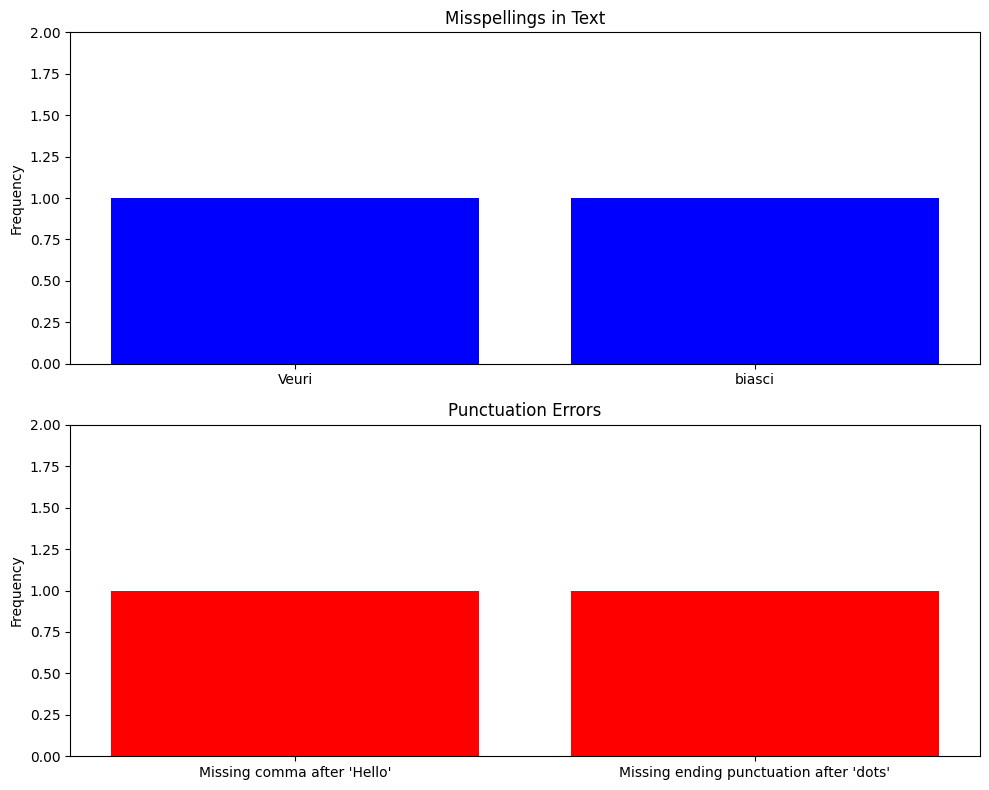

In [18]:
# Plotting the results
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].bar(misspelled, [1]*len(misspelled), color='blue')
axs[0].set_title('Misspellings in Text')
axs[0].set_ylabel('Frequency')
axs[0].set_ylim(0, 2)

axs[1].bar(punctuation_errors, [1]*len(punctuation_errors), color='red')
axs[1].set_title('Punctuation Errors')
axs[1].set_ylabel('Frequency')
axs[1].set_ylim(0, 2)

plt.tight_layout()
plt.show()